In [36]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

from shapely.geometry import Point, Polygon, MultiPolygon, MultiPoint

In [25]:
import matplotlib.pyplot as plt
import numpy as np

def generate_color_list(n):
    # Use a colormap to generate n distinct colors
    cmap = plt.get_cmap('hsv')
    colors = [cmap(i / n) for i in range(n)]
    return colors

n = 10
colors = generate_color_list(n)


In [32]:
triangle_coords = [
    (0.2, 0.2), (0.4, 0.8), (0.6, 0.2)
]
square_coords = [
    (0.7, 0.7), (0.9, 0.7), (0.9, 0.9), (0.7, 0.9)
]

triangle = Polygon(triangle_coords)
square = Polygon(square_coords)

inner2 = MultiPolygon([triangle, square])

In [37]:
points = [(0.1, 0.2), (0.4, 0.7), (0.8, 0.8), (0.3, 0.9), (0.6, 0.3)]
inner3 = MultiPoint(points)

3


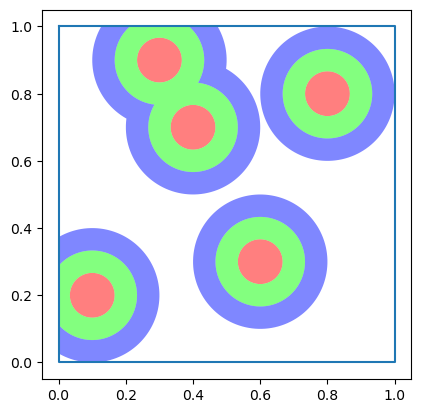

In [38]:
def get_circles(outer, inner, n_steps, max_distance=0.2):

    target_outers = np.linspace(0, max_distance, n_steps+1)[1:]
    outerouter = inner.buffer(max_distance)

    shapes = [inner]

    # for distance in target_outers:
    distance = target_outers[0]

    for i in range(n_steps):

        shapes.append(shapes[-1].buffer(distance))

        # new_outer = larger.difference(smaller)


    rings = []

    # for outer_ring, to_exclude in zip(shapes[::-1], shapes[1::-1]):
    for outer_ring, to_exclude in zip(shapes[1:], shapes):

        new_ring = outer_ring.difference(to_exclude).intersection(outer)
        rings.append(new_ring)
        

    fig, ax = plt.subplots()

    ax.plot(*outer.exterior.xy)
    # ax.plot(*inner.exterior.xy)

    print(n_steps)

    # for shape in shapes:
    colors = generate_color_list(n_steps)

    for ring, c in zip(rings, colors):
        # ax.plot(*ring.exterior.xy, alpha=0.5)
        # ax.fill(*ring.exterior.xy, alpha=0.5)

        gpd.GeoSeries([ring]).plot(ax=ax, alpha=0.5, color=c)

    plt.show()




outer = Polygon([(0, 1), (1, 1), (1, 0), (0, 0)])
inner1 = Polygon([
    (0.5, 0.8),
    (0.7, 0.8),
    (0.8, 0.6),
    (0.6, 0.4),
    (0.8, 0.2),
    (0.4, 0.1),
    (0.2, 0.4),
])




get_circles(outer, inner3, 3)